In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import os
#os.chdir('/content/drive/MyDrive/SSL')
!if [ -d cs294-158-ssl ]; then rm -Rf cs294-158-ssl; fi
!git clone https://github.com/ckurtz/cs294-158-ssl
!pip install cs294-158-ssl/

os.chdir('cs294-158-ssl')

Cloning into 'cs294-158-ssl'...
remote: Enumerating objects: 611, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 611 (delta 115), reused 119 (delta 53), pack-reused 422 (from 1)
Receiving objects: 100% (611/611), 3.11 MiB | 6.67 MiB/s, done.
Resolving deltas: 100% (424/424), done.
Processing ./cs294-158-ssl
  Preparing metadata (setup.py) ... done
  Created wheel for deepul_helper: filename=deepul_helper-0.1.0-py3-none-any.whl size=25300 sha256=aa002c0030a498aabd7c97a6b3115ad697e173310219f12d1350f1c0233d9477
  Stored in directory: /root/.cache/pip/wheels/e3/df/97/281e32d717214451862e0e558746de423b9ef530b7376421e2
Successfully built deepul_helper


In [3]:

!wget https://camille-kurtz.com/teaching/data.zip
!unzip -qq data.zip
!rm data.zip


--2024-11-10 17:38:13--  https://camille-kurtz.com/teaching/data.zip
Resolving camille-kurtz.com (camille-kurtz.com)... 213.186.33.3
Connecting to camille-kurtz.com (camille-kurtz.com)|213.186.33.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4227668031 (3.9G) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   3.94G  18.0MB/s    in 3m 56s  

2024-11-10 17:42:11 (17.1 MB/s) - ‘data.zip’ saved [4227668031/4227668031]



In [4]:
!pip install warmup_scheduler

  Preparing metadata (setup.py) ... done
  Created wheel for warmup_scheduler: filename=warmup_scheduler-0.3-py3-none-any.whl size=2971 sha256=a97d538ca9ed391d837f3a71389596b014817d5049fa5422f73b476c4b45ebe8
  Stored in directory: /root/.cache/pip/wheels/59/01/9e/d1820991c32916e9808c940f572b462f3e46427f3e76c4d852
Successfully built warmup_scheduler


In [5]:
!wget https://camille-kurtz.com/teaching/results.zip
!unzip -qq results.zip
!rm results.zip

--2024-11-10 17:42:51--  https://camille-kurtz.com/teaching/results.zip
Resolving camille-kurtz.com (camille-kurtz.com)... 213.186.33.3
Connecting to camille-kurtz.com (camille-kurtz.com)|213.186.33.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2636425194 (2.5G) [application/zip]
Saving to: ‘results.zip’

results.zip         100%[===================>]   2.46G  12.8MB/s    in 3m 16s  

2024-11-10 17:46:08 (12.8 MB/s) - ‘results.zip’ saved [2636425194/2636425194]



In [6]:
import kagglehub
path = kagglehub.dataset_download('WilyZh/ImageNet100')

100%|██████████| 14.1G/14.1G [11:42<00:00, 21.5MB/s]

Extracting files...


In [7]:
import shutil
shutil.move(os.path.join(path,'ImageNet100') , 'data/imagenet')

'data/imagenet'

In [8]:
!python create_imagenet_subset.py 100

Creating a subset of ImageNet with 100 classes
100% 100/100 [00:46<00:00,  2.16it/s]


In [9]:
!python train_self_supervised_task.py -d imagenet100 -t context_encoder -b 64 -e 5 --lr 1e-3 --o adam


Starting process on GPU: 0
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
[rank0]:[W1110 18:01:29.687886946 reducer.cpp:1400] Warning: find_unused_parameters=True was specified in DDP constructor, but did not find any unused parameters in the forward pass. This flag results in an extra traversal of the autograd graph every iteration,  which can adversely affect performance. If your model indeed never has any unused parameters in the forward pass, consider turning this flag off. Note that this warning may be a false positive if your model has flow control causing later iterations to h

In [10]:
!python train_self_supervised_task.py -d imagenet100 -t rotation -b 64 -e 5 --lr 1e-3 --o adam

Starting process on GPU: 0
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
[rank0]:[W1110 18:21:13.711173167 reducer.cpp:1400] Warning: find_unused_parameters=True was specified in DDP constructor, but did not find any unused parameters in the forward pass. This flag results in an extra traversal of the autograd graph every iteration,  which can adversely affect performance. If your model indeed never has any unused parameters in the forward pass, consider turning this flag off. Note that this warning may be a false positive if your model has flow control causing later iterations to h

In [11]:
!python train_self_supervised_task.py -d imagenet100 -t simclr -b 64 -e 5 --lr 1e-3 --o adam


Starting process on GPU: 0
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
[rank0]:[W1110 18:52:05.587697063 reducer.cpp:1400] Warning: find_unused_parameters=True was specified in DDP constructor, but did not find any unused parameters in the forward pass. This flag results in an extra traversal of the autograd graph every iteration,  which can adversely affect performance. If your model indeed never has any unused parameters in the forward pass, consider turning this flag off. Note that this warning may be a false positive if your model has flow control causing later iterations to h

In [12]:

from deepul_helper.demos import load_model_and_data,unnormalize, evaluate_accuracy,evaluate_classifier, display_nearest_neighbors, show_context_encoder_inpainting

%matplotlib inline

In [13]:
def get_accuracy(task, dataset='cifar10'):
  model, linear_classifier, train_loader, test_loader = load_model_and_data(task, dataset)
  train_acc1, train_acc5 = evaluate_classifier(model, linear_classifier, train_loader)
  test_acc1, test_acc5 = evaluate_classifier(model, linear_classifier, test_loader)
  return train_acc1, train_acc5, test_acc1, test_acc5

In [14]:
train_acc1_context_encoder_imagenet100,\
train_acc5_context_encoder_imagenet100, \
test_acc1_context_encoder_imagenet100,\
test_acc5_context_encoder_imagenet100 = get_accuracy('context_encoder', 'imagenet100')
print(train_acc1_context_encoder_imagenet100, train_acc5_context_encoder_imagenet100, test_acc1_context_encoder_imagenet100, test_acc5_context_encoder_imagenet100)

/content/cs294-158-ssl/deepul_helper/demos.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(ckpt_pth, map_location='cpu')


5.592435017992068 18.35439540825188 4.98 17.16


In [15]:
train_acc1_rotation_imagenet100,\
train_acc5_rotation_imagenet100,\
test_acc1_rotation_imagenet100,\
test_acc5_rotation_imagenet100 = get_accuracy('rotation', 'imagenet100')
print(train_acc1_rotation_imagenet100, train_acc5_rotation_imagenet100, test_acc1_rotation_imagenet100, test_acc5_rotation_imagenet100)

19.09400184657604 43.17738714345282 22.12 49.28


In [16]:
train_acc1_simclr_imagenet100,\
train_acc5_simclr_imagenet100,\
test_acc1_simclr_imagenet100,\
test_acc5_simclr_imagenet100 = get_accuracy('simclr', 'imagenet100')
print(train_acc1_simclr_imagenet100, train_acc5_simclr_imagenet100, test_acc1_simclr_imagenet100, test_acc5_simclr_imagenet100)

11.599270654557044 33.336753780928454 11.7 33.62


In [17]:
import pandas as pd
imagenet100_results =[]
imagenet100_results.append(['context_encode',train_acc1_context_encoder_imagenet100, train_acc5_context_encoder_imagenet100, test_acc1_context_encoder_imagenet100, test_acc5_context_encoder_imagenet100])
imagenet100_results.append(['rotation',train_acc1_rotation_imagenet100, train_acc5_rotation_imagenet100, test_acc1_rotation_imagenet100, test_acc5_rotation_imagenet100])
imagenet100_results.append(['simclr',train_acc1_simclr_imagenet100, train_acc5_simclr_imagenet100, test_acc1_simclr_imagenet100, test_acc5_simclr_imagenet100])
df = pd.DataFrame(imagenet100_results, columns = ['task','train_acc1','train_acc5','test_acc1','test_acc5'])
df

,task,train_acc1,train_acc5,test_acc1,test_acc5
0,context_encode,5.592435,18.354395,4.98,17.16
1,rotation,19.094002,43.177387,22.12,49.28
2,simclr,11.599271,33.336754,11.70,33.62


In [18]:
train_acc1_context_encoder_cifar10,\
train_acc5_context_encoder_cifar10, \
test_acc1_context_encoder_cifar10, \
test_acc5_context_encoder_cifar10 = get_accuracy('context_encoder', 'cifar10')
print(train_acc1_context_encoder_cifar10, train_acc5_context_encoder_cifar10, test_acc1_context_encoder_cifar10, test_acc5_context_encoder_cifar10)

Files already downloaded and verified
Files already downloaded and verified


/content/cs294-158-ssl/deepul_helper/demos.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(ckpt_pth, map_location='cpu')


53.242 94.094 45.78 90.29


In [19]:
train_acc1_rotation_cifar10,\
train_acc5_rotation_cifar10, \
test_acc1_rotation_cifar10, \
test_acc5_rotation_cifar10 = get_accuracy('rotation', 'cifar10')
print(train_acc1_rotation_cifar10, train_acc5_rotation_cifar10, test_acc1_rotation_cifar10, test_acc5_rotation_cifar10)

Files already downloaded and verified
Files already downloaded and verified
79.402 99.162 79.91 99.12


In [20]:
train_acc1_simclr_cifar10,\
train_acc5_simclr_cifar10, \
test_acc1_simclr_cifar10, \
test_acc5_simclr_cifar10 = get_accuracy('simclr', 'cifar10')
print(train_acc1_simclr_cifar10, train_acc5_simclr_cifar10, test_acc1_simclr_cifar10, test_acc5_simclr_cifar10)

Files already downloaded and verified
Files already downloaded and verified
89.994 99.462 92.84 99.87


In [21]:
import pandas as pd
cifar10_results =[]
cifar10_results.append(['context_encoder',train_acc1_context_encoder_cifar10, train_acc5_context_encoder_cifar10, test_acc1_context_encoder_cifar10, test_acc5_context_encoder_cifar10])
cifar10_results.append(['rotation',train_acc1_rotation_cifar10, train_acc5_rotation_cifar10, test_acc1_rotation_cifar10, test_acc5_rotation_cifar10])
cifar10_results.append(['simclr',train_acc1_simclr_cifar10, train_acc5_simclr_cifar10, test_acc1_simclr_cifar10, test_acc5_simclr_cifar10])
df = pd.DataFrame(cifar10_results, columns = ['task','train_acc1','train_acc5','test_acc1','test_acc5'])
df

,task,train_acc1,train_acc5,test_acc1,test_acc5
0,context_encoder,53.242,94.094,45.78,90.29
1,rotation,79.402,99.162,79.91,99.12
2,simclr,89.994,99.462,92.84,99.87


In [22]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def predire_la_position_relative(task, dataset='cifar10'):
    model, _, _, test_loader = load_model_and_data(task, dataset)
    images = next(iter(test_loader))[0][:8]
    with torch.no_grad():
        images = images.cuda(non_blocking=True)
        images_masked, images_recon = model.reconstruct(images)
        images_masked = unnormalize(images_masked.cpu(), dataset)
        images_recon = unnormalize(images_recon.cpu(), dataset)

        images = torch.stack((images_masked, images_recon), dim=1).flatten(end_dim=1)

        grid_img = make_grid(images, nrow=4)
        grid_img = (grid_img.permute(1, 2, 0) * 255.).numpy().astype('uint8')

        plt.figure()
        plt.axis('off')
        plt.imshow(grid_img)
        plt.show()


Files already downloaded and verified
Files already downloaded and verified


/content/cs294-158-ssl/deepul_helper/demos.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(ckpt_pth, map_location='cpu')


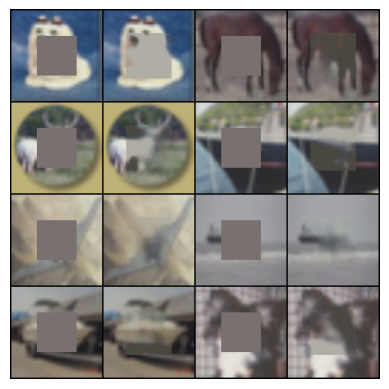

In [23]:
predire_la_position_relative('context_encoder', 'cifar10')

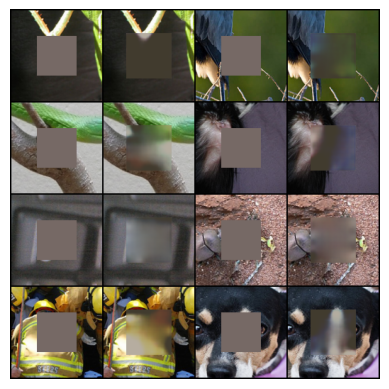

In [24]:
predire_la_position_relative('context_encoder', 'imagenet100')

In [34]:
import torch.optim as optim
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])


train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


class RelativePositionModel(nn.Module):
    def __init__(self):
        super(RelativePositionModel, self).__init__()
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Linear(128 * 8 * 8, 256),
            nn.ReLU(),
            nn.Linear(256, 8)
        )

    def forward(self, query_patch, target_patch):
        query_features = self.feature_extractor(query_patch)
        target_features = self.feature_extractor(target_patch)
        combined_features = torch.cat((query_features, target_features), dim=1)
        combined_features = combined_features.view(combined_features.size(0), -1)
        output = self.fc(combined_features)
        return output

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


model = RelativePositionModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)



def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for query_patch, target_patch, labels in train_loader:
            query_patch, target_patch, labels = query_patch.to(device), target_patch.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(query_patch, target_patch)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")


def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for query_patch, target_patch, labels in test_loader:
            query_patch, target_patch, labels = query_patch.to(device), target_patch.to(device), labels.to(device)
            outputs = model(query_patch, target_patch)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")


train(model, train_loader, criterion, optimizer)
evaluate(model, test_loader)


Files already downloaded and verified
Files already downloaded and verified


ValueError: not enough values to unpack (expected 3, got 2)